In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.lines import Line2D

In [2]:
def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()

In [3]:
def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]

In [4]:
text_style = {
    "horizontalalignment": "right",
    "verticalalignment": "center",
    "fontsize": 12,
    "fontfamily": "monospace",
}

marker_style = {
    "linestyle": ":",
    "color": "0.8",
    "markersize": 10,
    "markerfacecolor": "tab:blue",
    "markeredgecolor": "tab:blue",
}

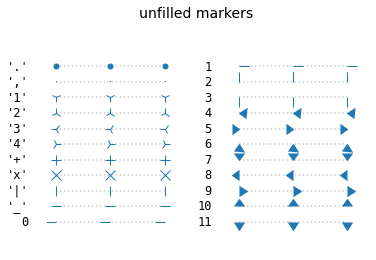

In [5]:
# unfilled markers
from posixpath import split


fig, axs = plt.subplots(ncols=2)
fig.suptitle("unfilled markers", fontsize=14)

# filter out filled markers and marker settings that do nothing
unfilled_markers = []
for m, func in Line2D.markers.items():
    if func != "nothing" and m not in Line2D.filled_markers:
        unfilled_markers.append(m)

for ax, markers in zip(axs, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

plt.show()

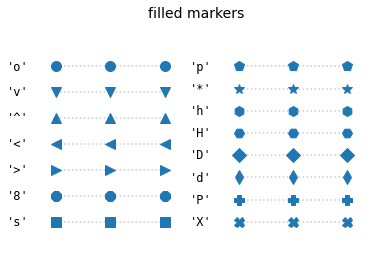

In [6]:
fig, axs = plt.subplots(ncols=2)
fig.suptitle("filled markers", fontsize=14)

for ax, markers in zip(axs, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

plt.show()

In [7]:
filled_marker_style = {
    "marker": "o",
    "linestyle": ":",
    "markersize": 15,
    "color": "darkgrey",
    "markerfacecolor": "tab:blue",
    "markerfacecoloralt": "lightsteelblue",
    "markeredgecolor": "brown",
}

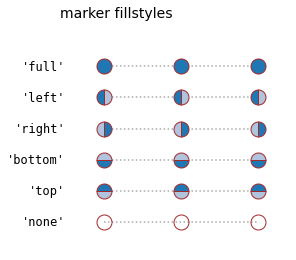

In [8]:
fig, ax = plt.subplots()
fig.suptitle("marker fillstyles", fontsize=14)
fig.subplots_adjust(left=0.4)

for y, fill_style in enumerate(Line2D.fillStyles):
    ax.text(-0.5, y, repr(fill_style), **text_style)
    ax.plot([y] * 3, fillstyle=fill_style, **filled_marker_style)

format_axes(ax)
plt.show()

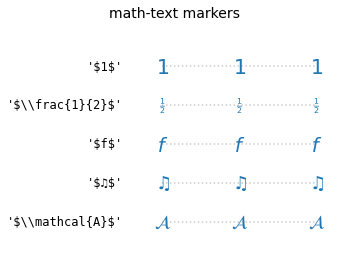

In [9]:
fig, ax = plt.subplots()
fig.suptitle("math-text markers", fontsize=14)
fig.subplots_adjust(left=0.4)

marker_style.update(markeredgecolor="none", markersize=15)
markers = ["$1$", r"$\frac{1}{2}$", "$f$", "$\u266B$", r"$\mathcal{A}$"]

for y, marker in enumerate(markers):
    # escape dollars so that the text is written "as is", not as mathtext
    ax.text(-0.5, y, repr(marker).replace("$", r"\$"), **text_style)
    ax.plot([y] * 3, marker=marker, **marker_style)

format_axes(ax)
plt.show()

In [10]:
from os import curdir


star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()

# concatenate the circle with an internal cutout of the star
cut_star = mpath.Path(
    vertices=np.concatenate([circle.vertices, star.vertices[::-1, ...]]),
    codes=np.concatenate([circle.codes, star.codes])
)

markers = {"star": star, "circle": circle, "cut_star": cut_star}

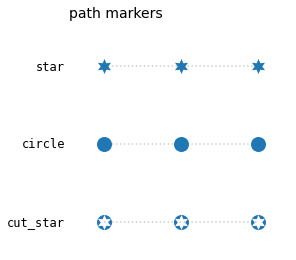

In [11]:
fig, ax = plt.subplots()
fig.suptitle("path markers", fontsize=14)
fig.subplots_adjust(left=0.4)

for y, (name, marker) in enumerate(markers.items()):
    ax.text(-0.5, y, name, **text_style)
    ax.plot([y] * 3, marker=marker, **marker_style)

format_axes(ax)
plt.show()